# Numerical Simulation Laboratory                                                         
                                        Department of Physics, University of Milan(It)
                                        Spring 2020 
                                                                     Mattia Corigliano
## 11<sup>th </sup> Computational Exercise

## Machine Learning

In [60]:
# useful libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

##  setting the Layout
import matplotlib as mpl
## LINES
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
## AXES
mpl.rcParams['axes.linewidth'] = 1 ## edge linewidth
mpl.rcParams['axes.grid'] = True ## display grid or not
mpl.rcParams['axes.titlesize'] = 16 ## fontsize of the axes title
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 14  ## fontsize of the x any y labels
mpl.rcParams['axes.formatter.limits'] = [-2,6] # use scientific notation if log10
mpl.rcParams['axes.formatter.use_mathtext'] = True # When True, use mathtext for scientific
mpl.rcParams['legend.fontsize'] = 12
## TICKS
mpl.rcParams['xtick.labelsize'] = 12 ## fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = 12 
mpl.rcParams['xtick.minor.visible'] = True ## visibility of minor ticks on x-axis
mpl.rcParams['ytick.minor.visible'] = True
## FIGURE
mpl.rcParams['figure.titleweight'] = 'bold' ## weight of the figure title
mpl.rcParams['figure.subplot.wspace'] = 0.4
mpl.rcParams['figure.subplot.hspace'] = 0.4
## ERRORBARS
mpl.rcParams['errorbar.capsize'] = 2  ## length of end cap on error bars in pixels

###   A. Linear Regression

We start by considering the problem of training a NN to fit a linear function:

$$
f(x)=mx+b
$$

#### --> Key parameters

In [105]:
m = 2 # slope
b = 1 # intersect

Npoints = 1000 ## number of points in the dataset 
Ntrain = int(0.8*Npoints) ## number of points in the training set
Nvalid = int(0.2*Npoints) ## number of points in the validation set
Nepochs = 100
batch_size = 32 ## typical dimensions are 32 64 128 256
Nlayers = 1
nodes_in = 1
nodes_layer = 1 

sigma = 0.5 # gaussian noise on the training and validation set
np.random.seed(0) ## fixing seed for reproducibility

#### --> Generate training and validation set

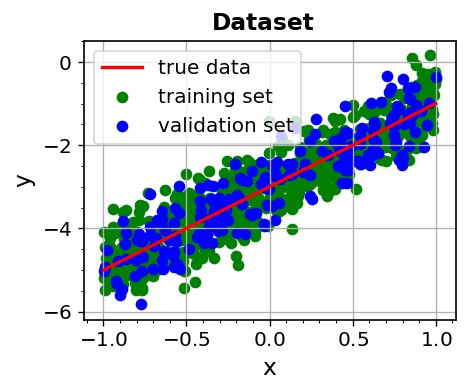

In [94]:
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()

# target parameters of f(x) = m*x + b

y_target = m * x_valid + b # ideal (target) linear function
y_train = np.random.normal(m * x_train + b, sigma) # actual measures
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Dataset', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9
plt.plot(x_valid, y_target, color='red', label = 'true data')
plt.scatter(x_train, y_train, color = 'green', label = 'training set')
plt.scatter(x_valid, y_valid, color='blue', label = 'validation set')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### ---> Define the NN model

In [106]:
model = tf.keras.Sequential()

for layer in range(Nlayers):
    model.add(Dense(nodes_layer, input_shape=(nodes_in,)))

## compile the model choosing optimizer, loss and metrics objects
## sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#### --> Training

In [83]:
# training
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))

# return weights
model.get_weights()

Epoch 1/100
25/25 [==============================] - 0s 6ms/step - loss: 1.0402 - mse: 1.0402 - val_loss: 0.7873 - val_mse: 0.7873
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5825 - mse: 0.5825 - val_loss: 0.5063 - val_mse: 0.5063
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3978 - mse: 0.3978 - val_loss: 0.3889 - val_mse: 0.3889
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3183 - mse: 0.3183 - val_loss: 0.3358 - val_mse: 0.3358
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2807 - mse: 0.2807 - val_loss: 0.3088 - val_mse: 0.3088
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2608 - mse: 0.2608 - val_loss: 0.2939 - val_mse: 0.2939
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2492 - mse: 0.2492 - val_loss: 0.2847 - val_mse: 0.2847
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2419 - m

[array([[1.9804631]], dtype=float32), array([1.0180277], dtype=float32)]

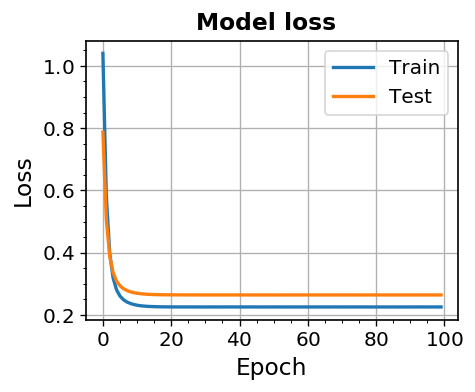

In [92]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Model loss', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#### --> Model's performance evaluation and prediction

7/7 [==============================] - 0s 2ms/step - loss: 4.3644e-04 - mse: 4.3644e-04

Test loss: 0.00043643935350701213
Test accuracy: 0.00043643935350701213


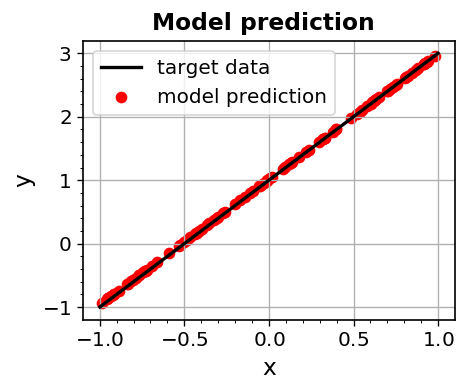

In [91]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Model prediction', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9
plt.scatter(x_predicted, y_predicted, color='red', label = 'model prediction')
plt.plot(x_valid, y_target, color = 'black', label = 'target data')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

###   B. Polynomial Regression

$$
f(x)=a + bx+cx^2+dx^3 \qquad \text{for} \  x \in [-1,1]
$$



#### --> Key parameters

In [107]:
a = 4.
b = -3.
c = -2.
d = 3.

Npoints = 1000 ## number of points in the dataset 
Ntrain = int(0.8*Npoints) ## number of points in the training set
Nvalid = int(0.2*Npoints) ## number of points in the validation set
Nepochs = 100
batch_size = 32 ## typical dimensions are 32 64 128 256
Nlayers = 1
nodes_in = 1
nodes_layer = 1 

sigma = 0.5 # gaussian noise on the training and validation set

#### --> Generate training and validation set

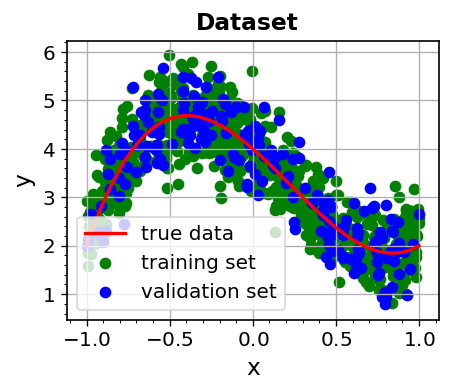

In [108]:
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()

y_target = a + b*x_valid+c*x_valid**2+d*x_valid**3# ideal (target) linear function
y_train = np.random.normal(a + b*x_train+c*x_train**2+d*x_train**3, sigma) # actual measures
y_valid = np.random.normal(a + b*x_valid+c*x_valid**2+d*x_valid**3, sigma)

# plot training and target dataset
plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Dataset', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9
plt.plot(x_valid, y_target, color='red', label = 'true data')
plt.scatter(x_train, y_train, color = 'green', label = 'training set')
plt.scatter(x_valid, y_valid, color='blue', label = 'validation set')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### ---> Define the NN model

In [109]:
model = tf.keras.Sequential()

model.add(Dense(1, input_shape=(Nnodes,)))
for layer in range(Nlayers):
    
## compile the model choosing optimizer, loss and metrics objects
## sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

IndentationError: expected an indented block (<ipython-input-109-91ee7921771e>, line 8)

#### --> Training

In [101]:
# training
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))

# return weights
model.get_weights()

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 11.3842 - mse: 11.3842 - val_loss: 7.4010 - val_mse: 7.4010
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 5.7130 - mse: 5.7130 - val_loss: 4.2120 - val_mse: 4.2120
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 3.3386 - mse: 3.3386 - val_loss: 2.8178 - val_mse: 2.8178
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 2.2586 - mse: 2.2586 - val_loss: 2.1310 - val_mse: 2.1310
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 1.7082 - mse: 1.7082 - val_loss: 1.7433 - val_mse: 1.7433
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 1.3956 - mse: 1.3956 - val_loss: 1.5012 - val_mse: 1.5012
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 1.2022 - mse: 1.2022 - val_loss: 1.3378 - val_mse: 1.3378
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 1.0749 -

[array([[2.7771745]], dtype=float32), array([3.3069186], dtype=float32)]